#Zika Virus Cases vs Population Density (Country-wise)
This notebook tries to find if any correlation exists between number of cases and population density of a particular area.

Following 14 countries were taken under observation:

1. Argentina
2. Brazil
3. Colombia
4. Dominican Republic
5. Ecuador
6. El Salvador
7. Guatemala
8. Haiti
9. Mexico
10. Nicaragua
11. Panama
12. Puerto Rico
13. US Virgin Islands
14. United States   





In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

In [ ]:
#load the dataset country-wise

df_argentina = pd.read_csv('arg.csv')
df_brazil = pd.read_csv('braz.csv')
df_colombia = pd.read_csv('col.csv')
df_dominican = pd.read_csv('dom.csv')
df_ecuador = pd.read_csv('ecuador.csv')
df_el_salvador = pd.read_csv('el_salvador.csv')
df_guatamela = pd.read_csv('guatamela.csv')
df_haiti = pd.read_csv('haiti.csv')
df_mexico = pd.read_csv('mexico.csv')
df_nicaragua = pd.read_csv('nicaragua.csv')
df_panama = pd.read_csv('panama.csv')
df_puerto = pd.read_csv('puerto.csv')
df_us = pd.read_csv('united_states.csv')
df_virgin_islands = pd.read_csv('us_virgin_islands.csv')



In [ ]:
df_argentina.head()

,location,cases,density_per_km
0,Argentina-Buenos_Aires,793,12625.800780
1,Argentina-CABA,647,12625.800780
2,Argentina-Catamarca,59,460.153595
3,Argentina-Chaco,460,121.331650
4,Argentina-Chubut,47,37.095642


In [ ]:
df_argentina.shape

(24, 3)

Text(0.5, 1.0, 'US_Virgin_Islands')

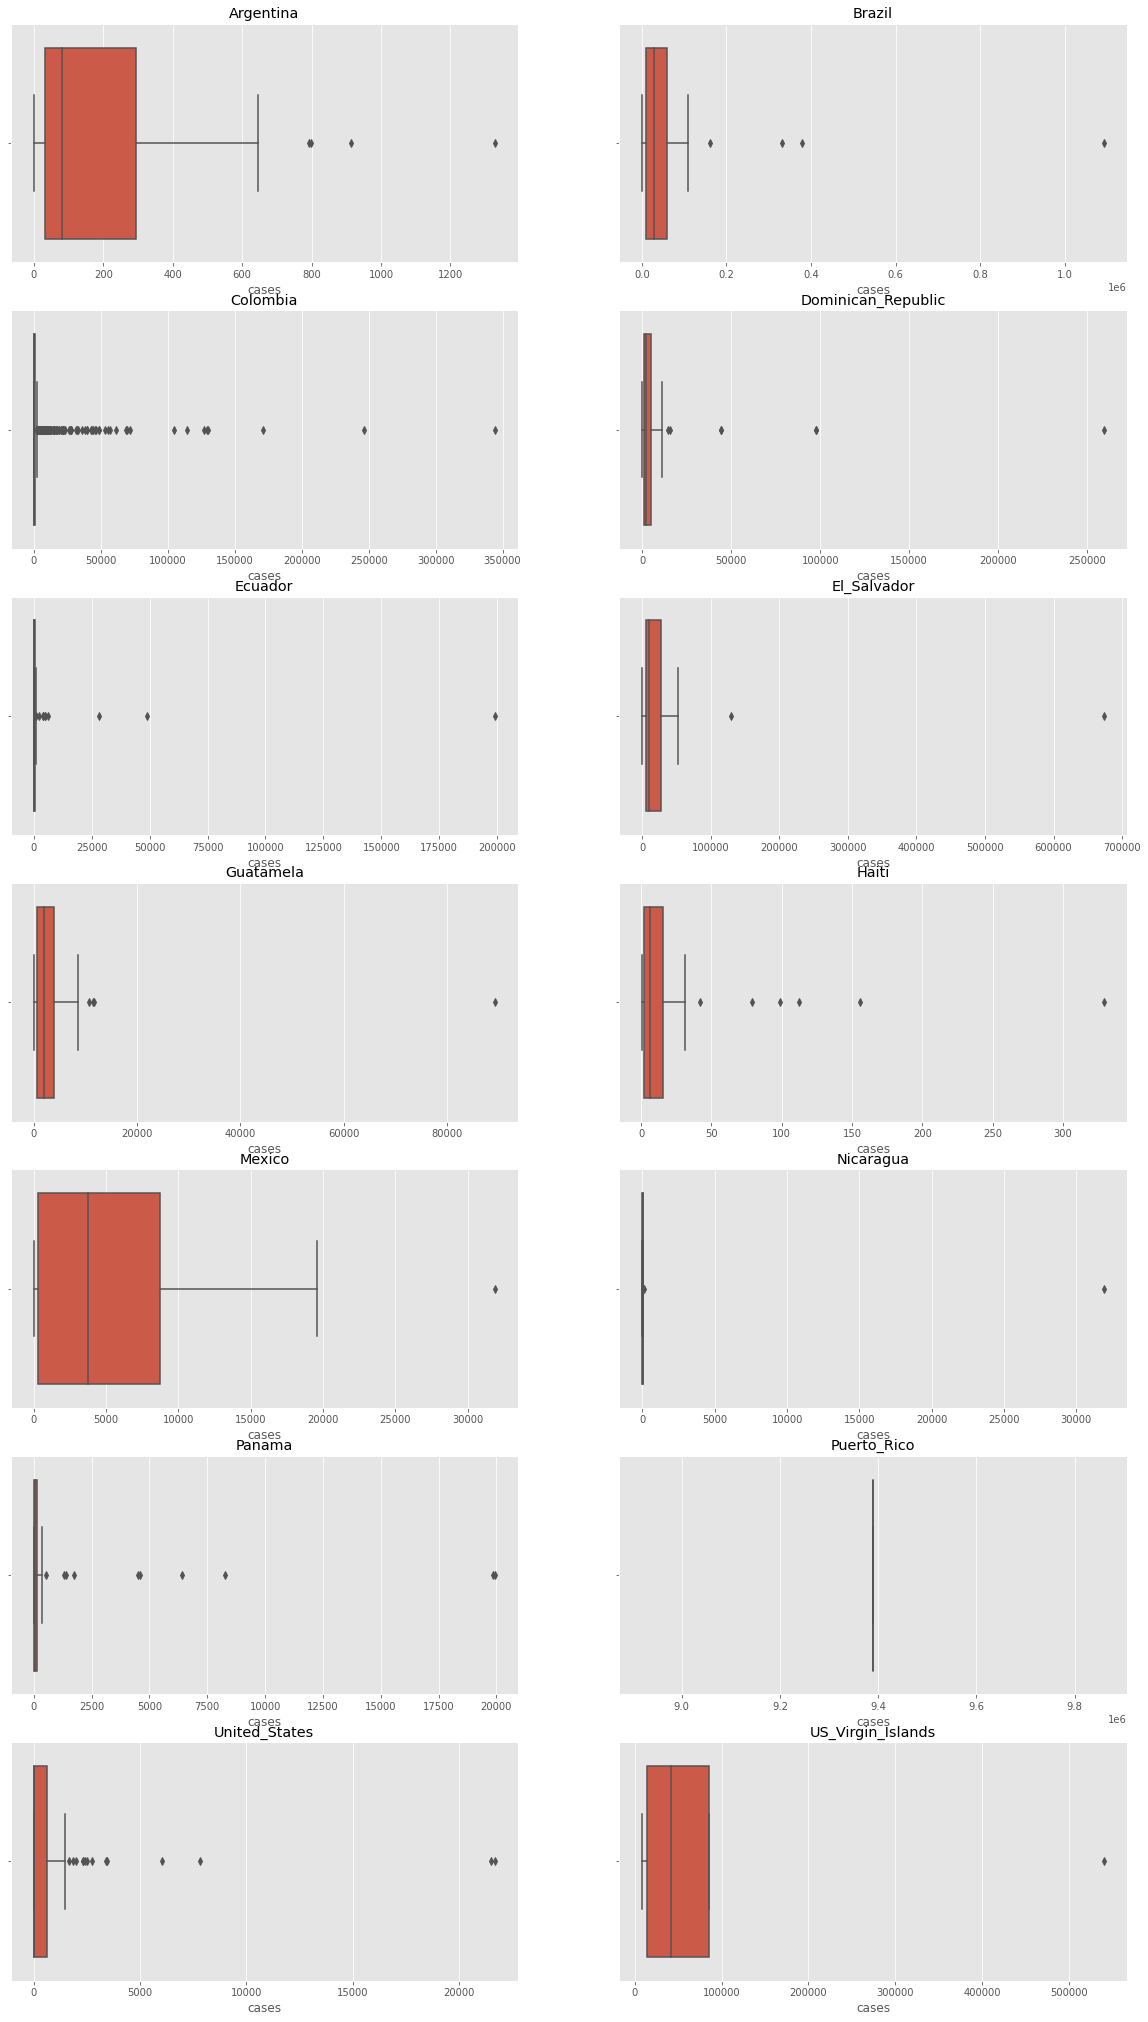

In [ ]:
# plot outliers
fig, axes = plt.subplots(7, 2, figsize=(20, 36))

sns.boxplot(ax=axes[0, 0], x =df_argentina['cases']).set_title("Argentina")
sns.boxplot(ax=axes[0, 1], x =df_brazil['cases']).set_title("Brazil")
sns.boxplot(ax=axes[1, 0], x =df_colombia['cases']).set_title("Colombia")
sns.boxplot(ax=axes[1, 1], x =df_dominican['cases']).set_title("Dominican_Republic")
sns.boxplot(ax=axes[2, 0], x =df_ecuador['cases']).set_title("Ecuador")
sns.boxplot(ax=axes[2, 1], x =df_el_salvador['cases']).set_title("El_Salvador")
sns.boxplot(ax=axes[3, 0], x =df_guatamela['cases']).set_title("Guatamela")
sns.boxplot(ax=axes[3, 1], x =df_haiti['cases']).set_title("Haiti")
sns.boxplot(ax=axes[4, 0], x =df_mexico['cases']).set_title("Mexico")
sns.boxplot(ax=axes[4, 1], x =df_nicaragua['cases']).set_title("Nicaragua")
sns.boxplot(ax=axes[5, 0], x =df_panama['cases']).set_title("Panama")
sns.boxplot(ax=axes[5, 1], x =df_puerto['cases']).set_title("Puerto_Rico")
sns.boxplot(ax=axes[6, 0], x =df_us['cases']).set_title("United_States")
sns.boxplot(ax=axes[6, 1], x =df_virgin_islands['cases']).set_title("US_Virgin_Islands")

In [ ]:
# Detecting outlier using Z-score
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [ ]:
countries = [df_argentina['cases'], df_brazil['cases'], df_colombia['cases'], df_dominican['cases'], df_ecuador['cases'], df_el_salvador['cases'], df_guatamela['cases'],
             df_haiti['cases'], df_mexico['cases'], df_nicaragua['cases'], df_panama['cases'], df_us['cases'], df_virgin_islands['cases']]

for country in range(len(countries)):
  outlier = detect_outliers(countries[country])
  # return outlier
  print(outlier)

[]
[1091664]
[1091664, 56964, 170942, 53272, 68917, 69430, 55100, 127087, 61585, 114708, 246741, 104803, 71638, 129063, 129753, 344279]
[1091664, 56964, 170942, 53272, 68917, 69430, 55100, 127087, 61585, 114708, 246741, 104803, 71638, 129063, 129753, 344279, 259483]
[1091664, 56964, 170942, 53272, 68917, 69430, 55100, 127087, 61585, 114708, 246741, 104803, 71638, 129063, 129753, 344279, 259483, 199044]
[1091664, 56964, 170942, 53272, 68917, 69430, 55100, 127087, 61585, 114708, 246741, 104803, 71638, 129063, 129753, 344279, 259483, 199044, 673127]
[1091664, 56964, 170942, 53272, 68917, 69430, 55100, 127087, 61585, 114708, 246741, 104803, 71638, 129063, 129753, 344279, 259483, 199044, 673127, 89329]
[1091664, 56964, 170942, 53272, 68917, 69430, 55100, 127087, 61585, 114708, 246741, 104803, 71638, 129063, 129753, 344279, 259483, 199044, 673127, 89329, 329]
[1091664, 56964, 170942, 53272, 68917, 69430, 55100, 127087, 61585, 114708, 246741, 104803, 71638, 129063, 129753, 344279, 259483, 199

In [ ]:
# Handle outliers
# Brazil has the outlier which is way too far away as compared to coresponding countries' outliers. 
df_brazil.drop(df_brazil[df_brazil['cases'] >= 1091664].index, inplace = True)

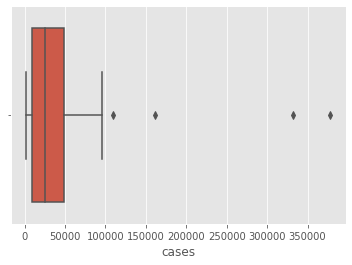

In [ ]:
sns.boxplot(x =df_brazil['cases'])

Text(0.5, 1.0, 'US_Virgin_Islands')

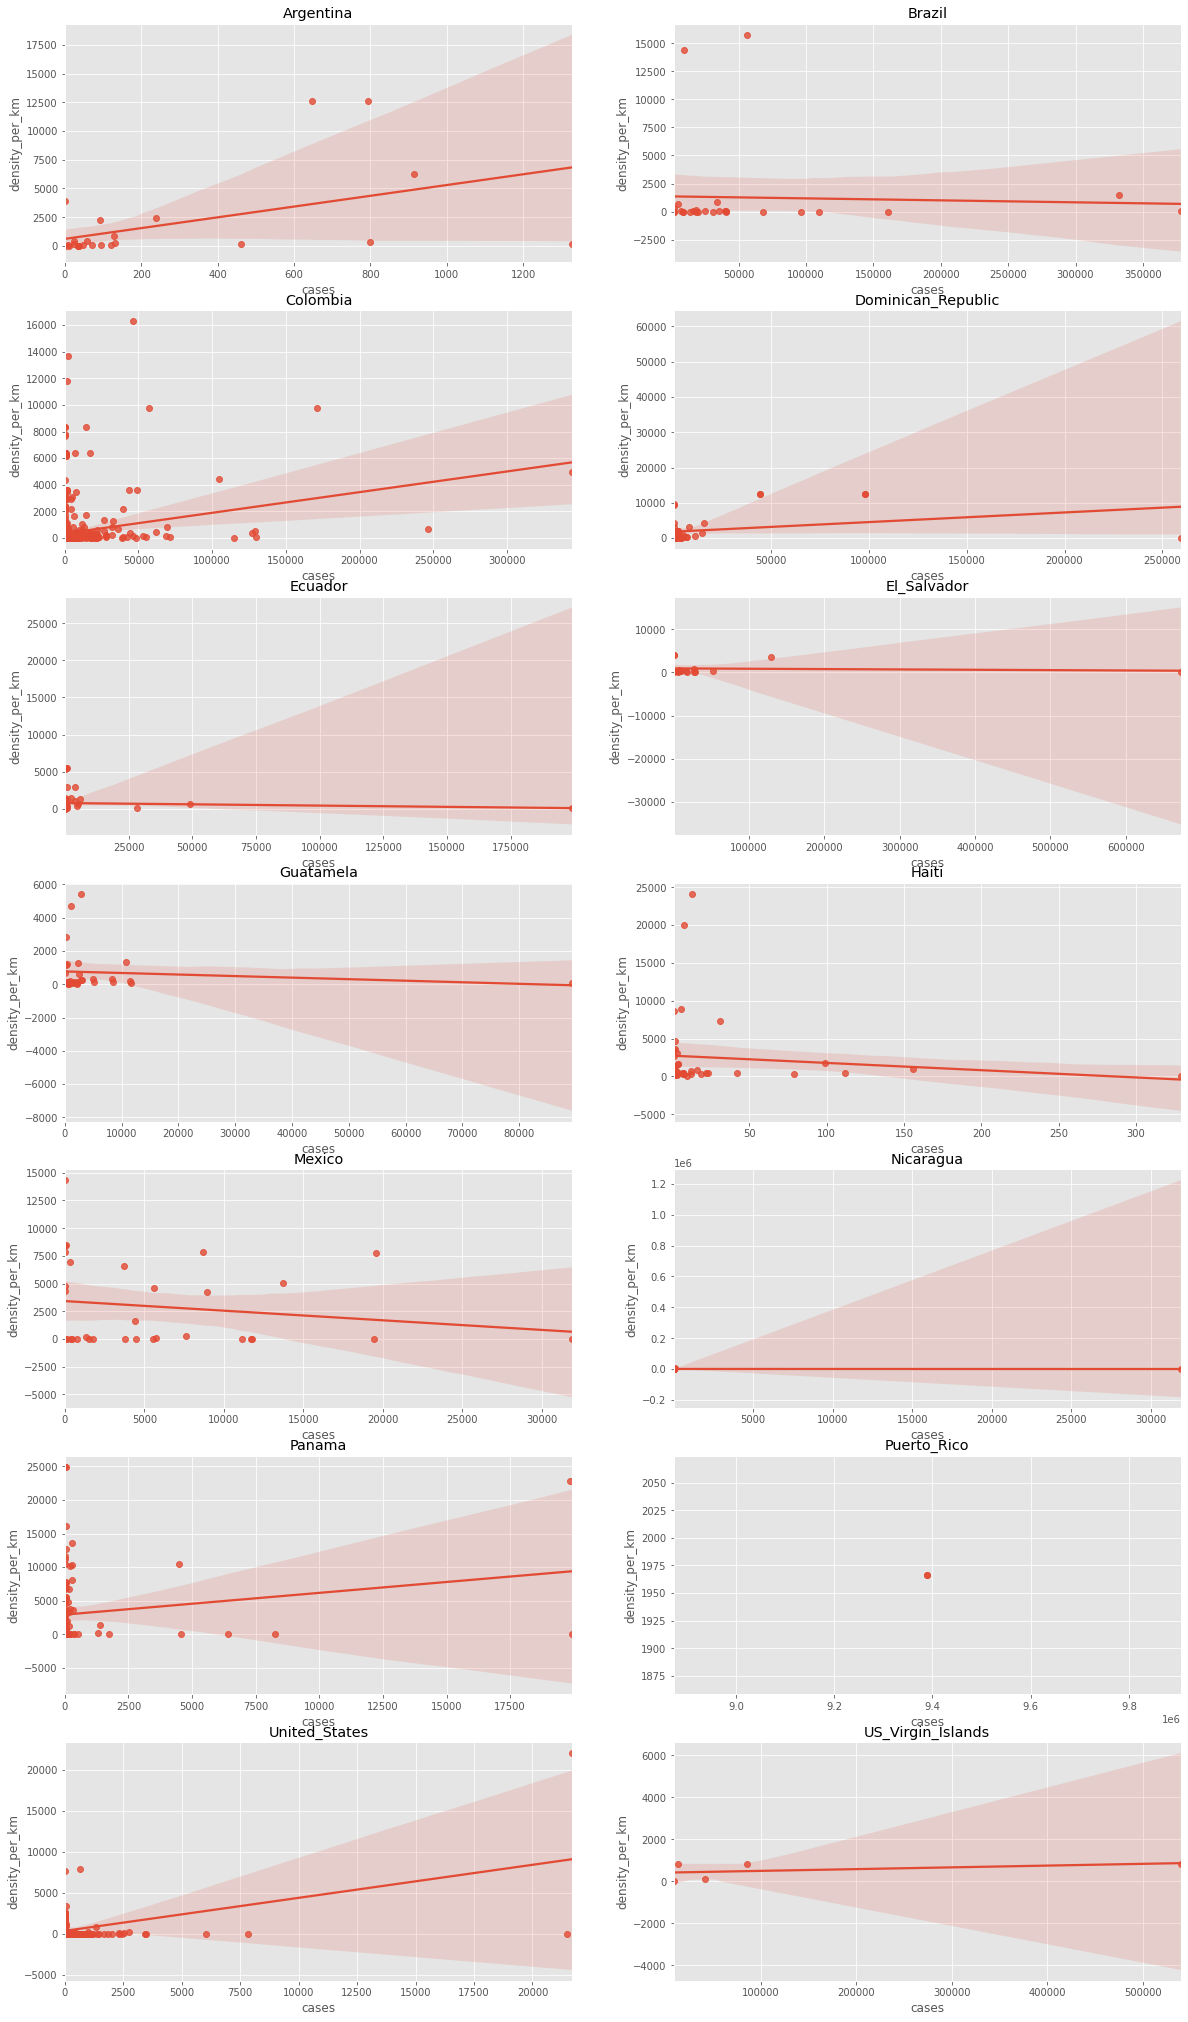

In [ ]:
#scatter plot
#checking the strength of the relationship using one regression line

fig, axes = plt.subplots(7, 2, figsize=(20, 36))

sns.regplot(ax=axes[0, 0], y=df_argentina['density_per_km'], x=df_argentina['cases']).set_title("Argentina")
sns.regplot(ax=axes[0, 1], y=df_brazil['density_per_km'], x=df_brazil['cases']).set_title("Brazil")
sns.regplot(ax=axes[1, 0], y=df_colombia['density_per_km'], x=df_colombia['cases']).set_title("Colombia")
sns.regplot(ax=axes[1, 1], y=df_dominican['density_per_km'], x=df_dominican['cases']).set_title("Dominican_Republic")
sns.regplot(ax=axes[2, 0], y=df_ecuador['density_per_km'], x=df_ecuador['cases']).set_title("Ecuador")
sns.regplot(ax=axes[2, 1], y=df_el_salvador['density_per_km'], x=df_el_salvador['cases']).set_title("El_Salvador")
sns.regplot(ax=axes[3, 0], y=df_guatamela['density_per_km'], x=df_guatamela['cases']).set_title("Guatamela")
sns.regplot(ax=axes[3, 1], y=df_haiti['density_per_km'], x=df_haiti['cases']).set_title("Haiti")
sns.regplot(ax=axes[4, 0], y=df_mexico['density_per_km'], x=df_mexico['cases']).set_title("Mexico")
sns.regplot(ax=axes[4, 1], y=df_nicaragua['density_per_km'], x=df_nicaragua['cases']).set_title("Nicaragua")
sns.regplot(ax=axes[5, 0], y=df_panama['density_per_km'], x=df_panama['cases']).set_title("Panama")
sns.regplot(ax=axes[5, 1], y=df_puerto['density_per_km'], x=df_puerto['cases']).set_title("Puerto_Rico")
sns.regplot(ax=axes[6, 0], y=df_us['density_per_km'], x=df_us['cases']).set_title("United_States")
sns.regplot(ax=axes[6, 1], y=df_virgin_islands['density_per_km'], x=df_virgin_islands['cases']).set_title("US_Virgin_Islands")


Text(0.5, 1.0, 'US_Virgin_Islands')

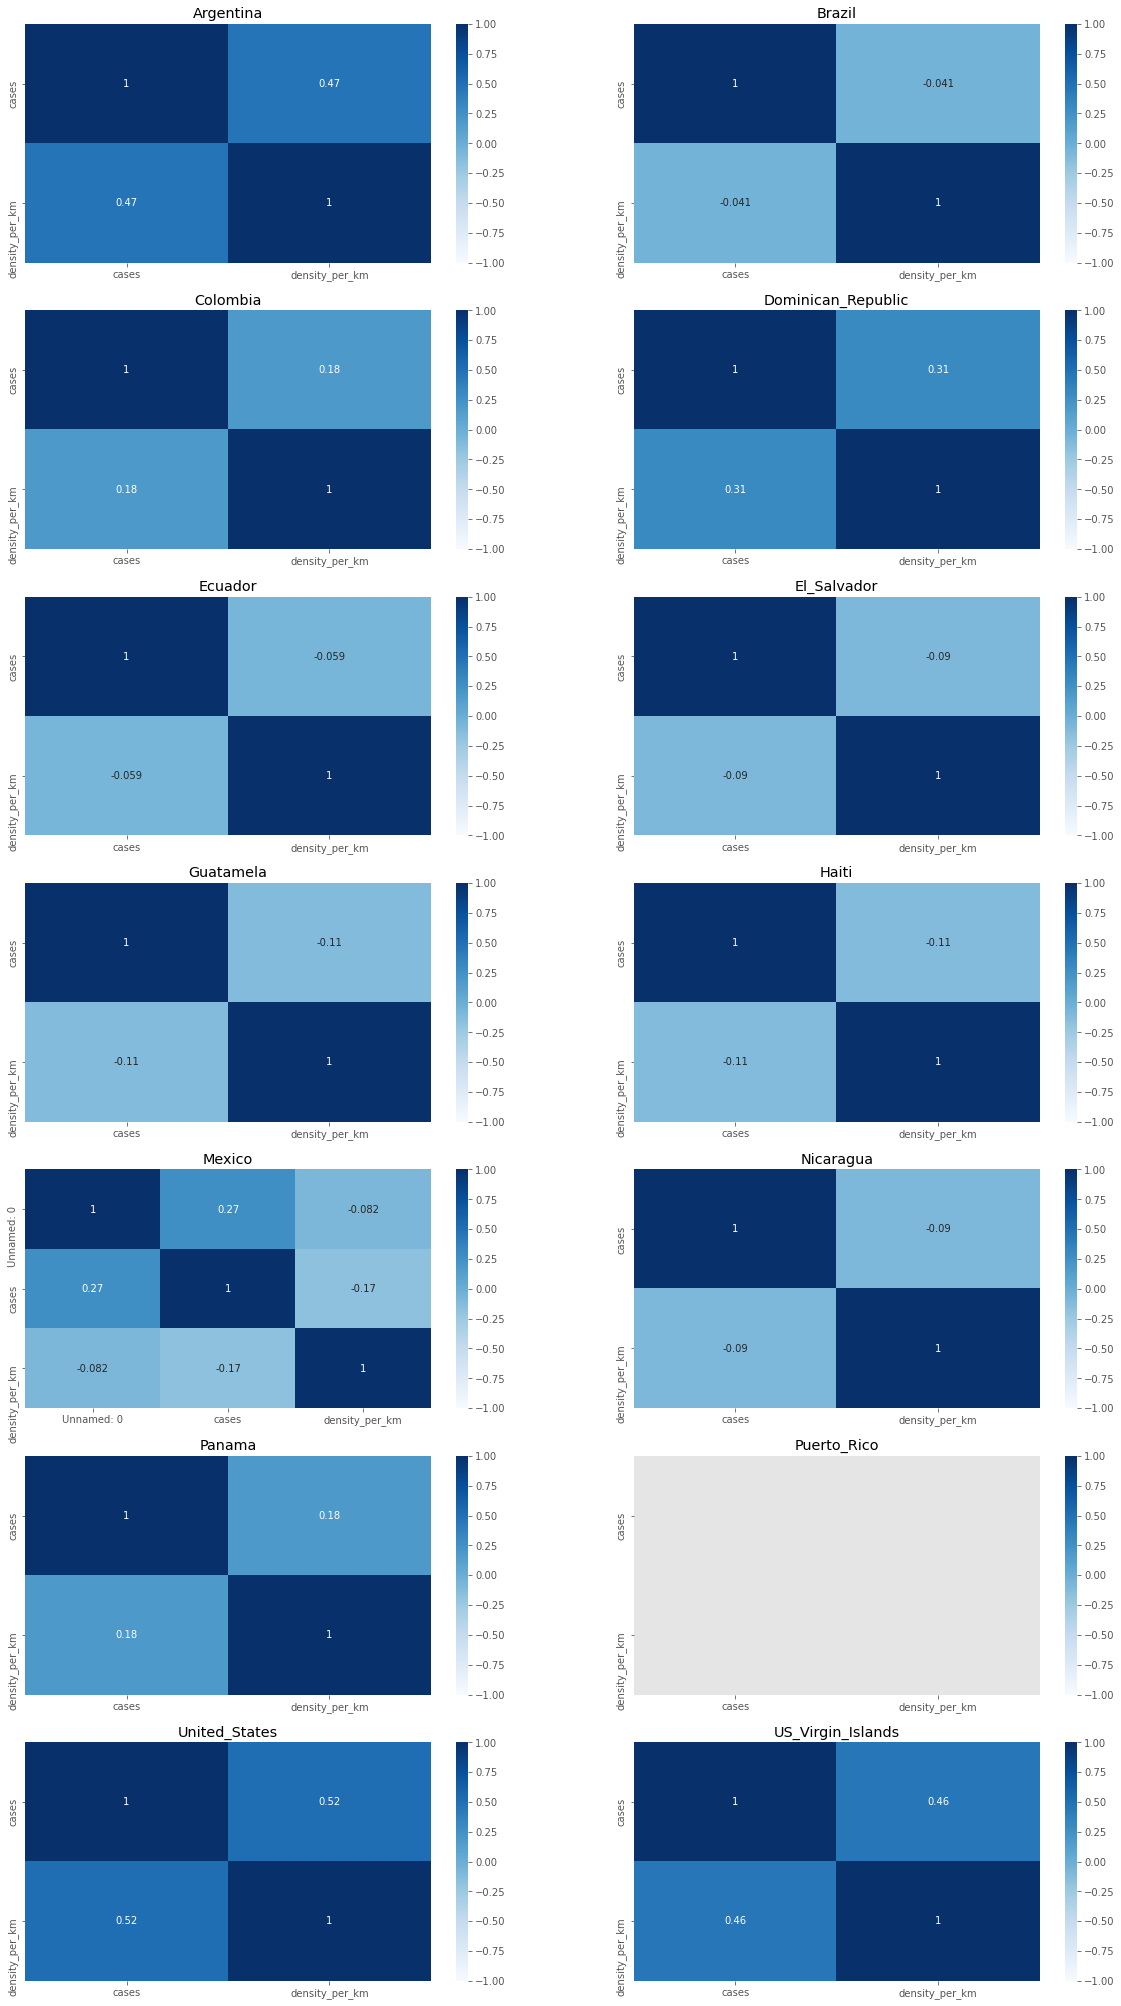

In [ ]:
#heatmaps to get the actual score of the strength.

fig, axes = plt.subplots(7, 2, figsize=(20, 36))

sns.heatmap(df_argentina.corr(), cmap='Blues', annot=True, vmax=1, vmin=-1, ax=axes[0, 0]).set_title("Argentina")
sns.heatmap(df_brazil.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[0, 1]).set_title("Brazil")
sns.heatmap(df_colombia.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[1, 0]).set_title("Colombia")
sns.heatmap(df_dominican.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[1, 1]).set_title("Dominican_Republic")
sns.heatmap(df_ecuador.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[2, 0]).set_title("Ecuador")
sns.heatmap(df_el_salvador.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[2, 1]).set_title("El_Salvador")
sns.heatmap(df_guatamela.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[3, 0]).set_title("Guatamela")
sns.heatmap(df_haiti.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[3, 1]).set_title("Haiti")
sns.heatmap(df_mexico.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[4, 0]).set_title("Mexico")
sns.heatmap(df_nicaragua.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[4, 1]).set_title("Nicaragua")
sns.heatmap(df_panama.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[5, 0]).set_title("Panama")
sns.heatmap(df_puerto.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[5, 1]).set_title("Puerto_Rico")
sns.heatmap(df_us.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[6, 0]).set_title("United_States")
sns.heatmap(df_virgin_islands.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, ax=axes[6, 1]).set_title("US_Virgin_Islands")

#Conclusion:

With the help of regression plot, we can see that:
Argentina, Colombia, Panama and United States have slight positive correlation between the no. of cases and population density.
From the heatmap we can see the actual score:
Argentina: 47%, 
Colombia: 18%, 
Panama: 18%, 
United States 52%.

Other countries have comparatively no relation or negative correlation among their parameters.

So, we can observe an uneven trend that there are more number of cases in densly populated area and at the same time there and more number of cases in less populated area.

Hence, there is no actual relation between the number of cases and population density. So, zika virus can spread irrespective of the number of poeple living in that area. 